## 2_18_25 

## Error Analysis...comparing angular errors to smallest angle where 100% accuracy is predicted

In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized with initial value R₀: -98.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized with initial value R₀: -97.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized with initial value R₀: -117.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized with initial value R₀: 442.0


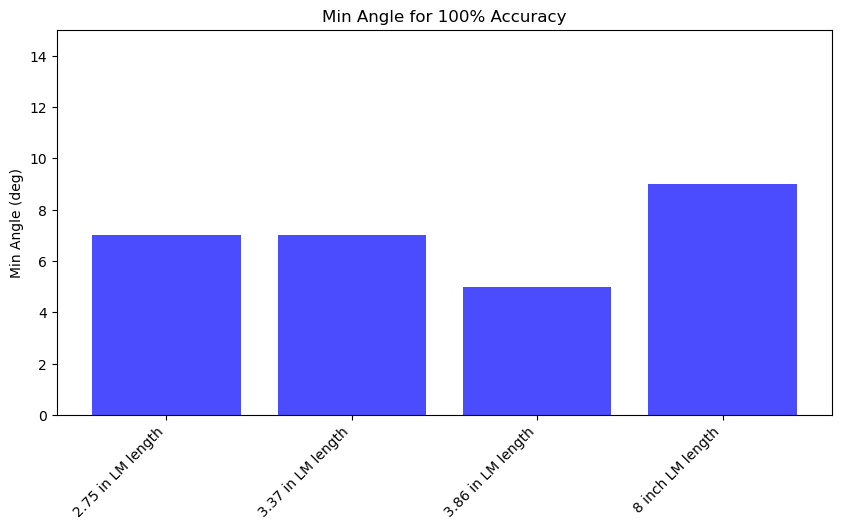

In [2]:
# varying abs channel length

# sample abs_1p53_bubble -> 2.75 in channel length
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
# sample abs_1p86_s2 -> 3.37 in channel length
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")
# sample abs_2p31 -> 3.86 in channel length
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")
# sample abs_100 -> 8 inch channel length
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")

DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles, DS4_datafiles]

ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.train_model_test_accuracy()
    min_angle_100, min_acc = g.get_min_accuracy_100()
    ma_100_list.append(min_angle_100)
        

bar_labels = ["2.75 in LM length", "3.37 in LM length", "3.86 in LM length", "8 inch LM length"]

g.plot_bar_chart(ma_100_list, bar_labels, title="Min Angle for 100% Accuracy", ylabel="Min Angle (deg)", color="b",
                ylim=(0, 15))

## Comparing raw data to trained model and then showing accuracy vs angle plot

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_6_2025/fourth test\\Bending_data_abs_1p758_4th_reapply_2_6_25.csv']
ADC normalized with initial value R₀: -107.0


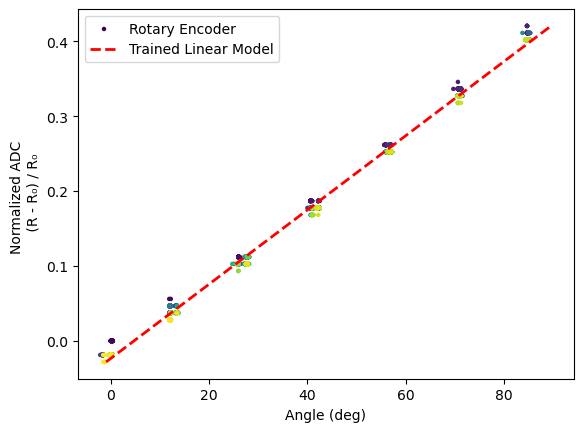

In [3]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/2_6_2025/fourth test/*.csv")
DS_all = [DS1_datafiles]


# Load and normalize data
g.load_data(DS1_datafiles)
g.normalize_adc_over_R0()

g.plot_data(scatter=True)


# Train the model
g.train_model_test_accuracy()

# Overlay trained model
g.plot_trained_model_on_existing()



['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized with initial value R₀: -98.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized with initial value R₀: -97.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized with initial value R₀: -117.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized with initial value R₀: 442.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.c

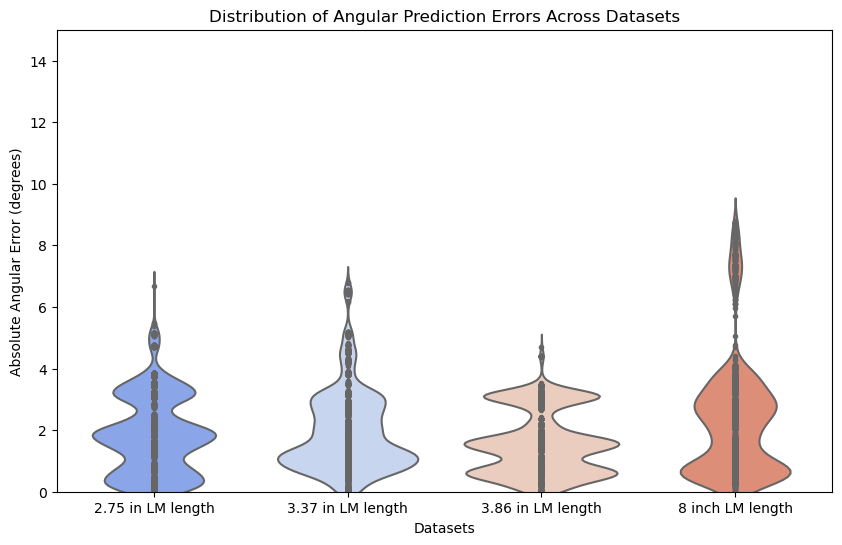

In [4]:
# varying abs channel length

# sample abs_1p53_bubble -> 2.75 in channel length
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
# sample abs_1p86_s2 -> 3.37 in channel length
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")
# sample abs_2p31 -> 3.86 in channel length
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")
# sample abs_100 -> 8 inch channel length
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")

DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles, DS4_datafiles]

ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.train_model_test_accuracy()
    min_angle_100, min_acc = g.get_min_accuracy_100()
    ma_100_list.append(min_angle_100)
    

error_dfs = []
dataset_labels = ["2.75 in LM length", "3.37 in LM length", "3.86 in LM length", "8 inch LM length"]

for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.train_model_test_accuracy()
    
    # Run cross-validation
    mean_error, std_error, predictions_df = g.cross_validation_angular_error()
    
    # Store DataFrame
    error_dfs.append(predictions_df)
    dataset_labels.append(f"Dataset {i_d+1}")

# Plot all datasets together
g.plot_error_violin(error_dfs, labels=dataset_labels)
    
    


### Use min max method to scale data from 0 to 1.  Then use one dataset to train model and apply to others.  Obtain min accuracy plot as well as angular error plot

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.c

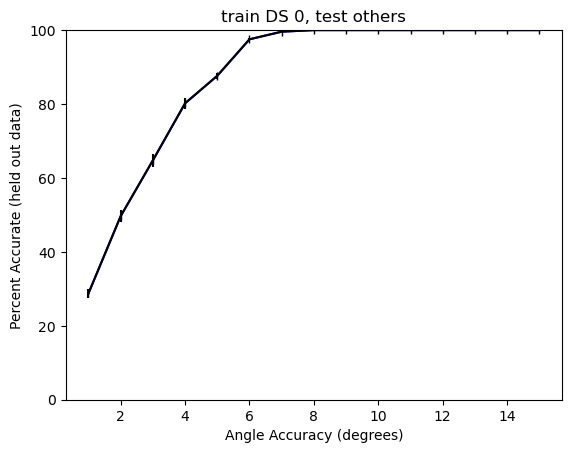

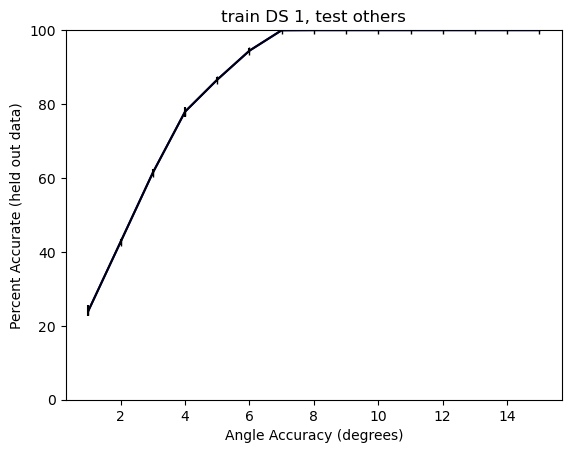

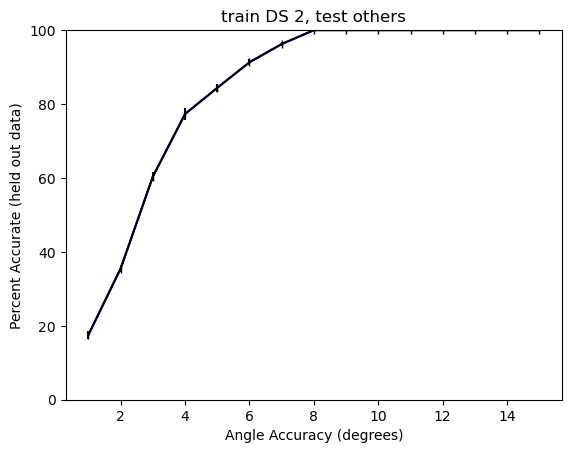

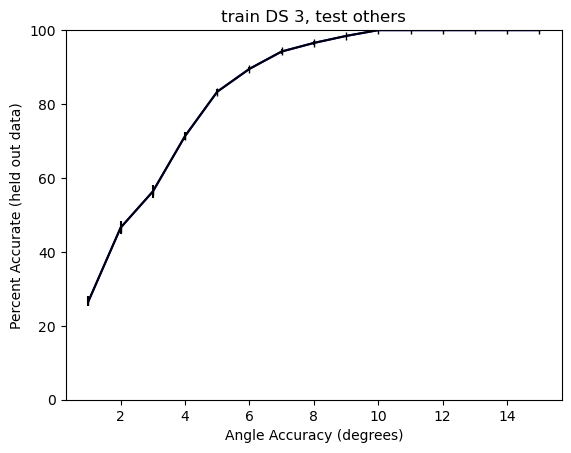

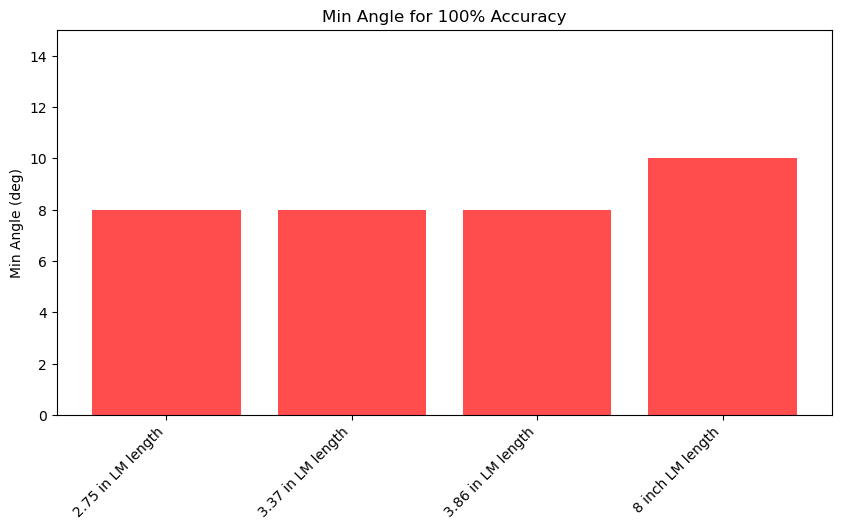

In [5]:
# varying abs channel length

# sample abs_1p53_bubble -> 2.75 in channel length
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")
# sample abs_1p86_s2 -> 3.37 in channel length
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")
# sample abs_2p31 -> 3.86 in channel length
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")
# sample abs_100 -> 8 inch channel length
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")

DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles, DS4_datafiles]

ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
      
    ## Now test data on other datasets
    ixs = [0, 1, 2, 3]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_bw_01()
    g3 = bender_class()
    g3.load_data(DS_all[ixs[1]])
    g3.normalize_adc_bw_01()
    g4 = bender_class()
    g4.load_data(DS_all[ixs[2]])
    g4.normalize_adc_bw_01()

    df_combined = pd.concat([g2.data, g3.data, g4.data], ignore_index=True)
   
    
    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    min_angle_100, min_acc = g.get_min_accuracy_100(accuracy_matrix=acc)
    ma_100_list.append(min_angle_100)
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)

    
   

bar_labels = ["2.75 in LM length", "3.37 in LM length", "3.86 in LM length", "8 inch LM length"]


g.plot_bar_chart(ma_100_list, bar_labels, title="Min Angle for 100% Accuracy", ylabel="Min Angle (deg)", color="r",
                ylim=(0, 15))

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.c

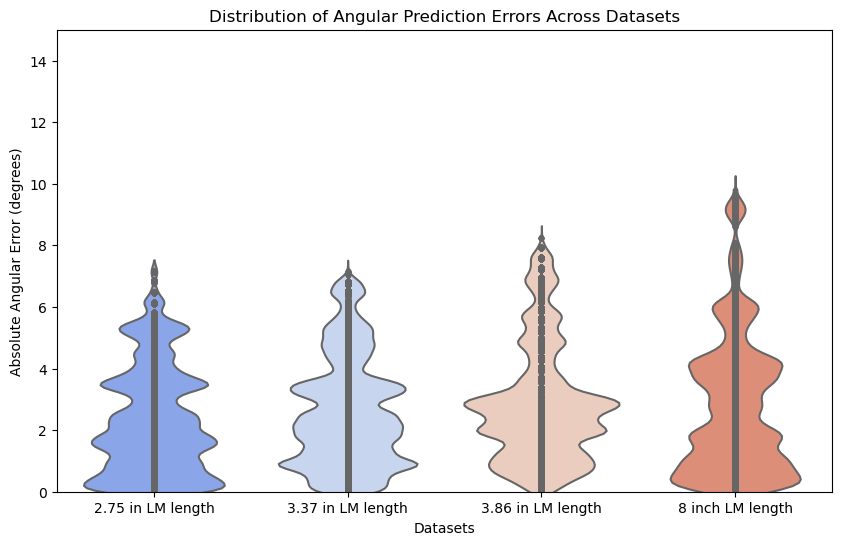

In [8]:
violin_data = []

for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
     
    ## Now test data on other datasets
    ixs = [0, 1, 2, 3]
    ixs.remove(i_d)

    ## Load external datasets
    external_datasets = [bender_class() for _ in ixs]
    for j, idx in enumerate(ixs):
        external_datasets[j].load_data(DS_all[idx])
        external_datasets[j].normalize_adc_bw_01()

    # Run cross-validation testing on external datasets
    mean_error, std_error, predictions_df = g.cross_validation_external_test(external_datasets)

      # Store predictions for violin plot
    violin_data.append(predictions_df)

# Use violin plot method to visualize error distribution
g.plot_error_violin(violin_data, labels= ["2.75 in LM length", "3.37 in LM length", "3.86 in LM length", "8 inch LM length"])
